## Week 4, Lab 2: Predicting Chronic Kidney Disease in Patients
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus on steps exploring data, building models and evaluating the models we build.

There are three links you may find important:
- [A set of chronic kidney disease (CKD) data and other biological factors](./chronic_kidney_disease_full.csv).
- [The CKD data dictionary](./chronic_kidney_disease_header.txt).
- [An article comparing the use of k-nearest neighbors and support vector machines on predicting CKD](./chronic_kidney_disease.pdf).

## Step 1: Define the problem.

Suppose you're working for Mayo Clinic, widely recognized to be the top hospital in the United States. In your work, you've overheard nurses and doctors discuss test results, then arrive at a conclusion as to whether or not someone has developed a particular disease or condition. For example, you might overhear something like:

> **Nurse**: Male 57 year-old patient presents with severe chest pain. FDP _(short for fibrin degradation product)_ was elevated at 13. We did an echo _(echocardiogram)_ and it was inconclusive.

> **Doctor**: What was his interarm BP? _(blood pressure)_

> **Nurse**: Systolic was 140 on the right; 110 on the left.

> **Doctor**: Dammit, it's an aortic dissection! Get to the OR _(operating room)_ now!

> _(intense music playing)_

In this fictitious but [Shonda Rhimes-esque](https://en.wikipedia.org/wiki/Shonda_Rhimes#Grey's_Anatomy,_Private_Practice,_Scandal_and_other_projects_with_ABC) scenario, you might imagine the doctor going through a series of steps like a [flowchart](https://en.wikipedia.org/wiki/Flowchart), or a series of if-this-then-that steps to diagnose a patient. The first steps made the doctor ask what the interarm blood pressure was. Because interarm blood pressure took on the values it took on, the doctor diagnosed the patient with an aortic dissection.

Your goal, as a research biostatistical data scientist at the nation's top hospital, is to develop a medical test that can improve upon our current diagnosis system for [chronic kidney disease (CKD)](https://www.mayoclinic.org/diseases-conditions/chronic-kidney-disease/symptoms-causes/syc-20354521).

**Real-world problem**: Develop a medical diagnosis test that is better than our current diagnosis system for CKD.

**Data science problem**: Develop a medical diagnosis test that reduces both the number of false positives and the number of false negatives.

What is important --> interarm blood

**Data science problem**: Develop a medical diagnosis test that reduces both the number of false positives and the number of false negatives.

In [77]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import train_test_split.
from sklearn.model_selection import train_test_split

# Import Logistic Regression model.
from sklearn.linear_model import LogisticRegression

# Import metrics.
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score

---

## Step 2: Obtain the data.

### 1. Read in the data.

In [78]:
df = pd.read_csv('chronic_kidney_disease_full.csv')

### 2. Check out the data dictionary. What are a few features or relationships you might be interested in checking out?

Answer:

1) BP
2) Age
3) 

In [79]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

---

## Step 3: Explore the data.

### 3. How much of the data is missing from each column?

In [80]:
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

### 4. Suppose that I dropped every row that contained at least one missing value. (In the context of analysis with missing data, we call this a "complete case analysis," because we keep only the complete cases!) How many rows would remain in our dataframe? What are at least two downsides to doing this?

> There's a good visual on slide 15 of [this deck](https://liberalarts.utexas.edu/prc/_files/cs/Missing-Data.pdf) that shows what a complete case analysis looks like if you're interested.

In [81]:
df.shape

(400, 25)

In [82]:
df['class'].value_counts(normalize = True)

ckd       0.625
notckd    0.375
Name: class, dtype: float64

In [83]:
    test = df.dropna()

In [84]:
test.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [85]:
test['class'].value_counts(normalize = True)

notckd    0.727848
ckd       0.272152
Name: class, dtype: float64

Answer:

1) Rows are left with 158 from 400 -->> there is a huge reduction, and we might not get good data of either results 
- df has good percentage of 60 over 30% while test has only 72 against 27%. Abit skewed but we can tank


2) Not best quality 

### 5. Thinking critically about how our data were gathered, it's likely that these records were gathered by doctors and nurses. Brainstorm three potential areas (in addition to the missing data we've already discussed) where this data might be inaccurate or imprecise.

Answer:

1) Different doctors and nurses might have different practise in the way they want to collect the results thus, might have some bias in terms of taking down notes. 

2) Patients might not want to disclose some of their information as they might be worried. 

3) They might not be trained, hence having inaccurate data 

---

## Step 4: Model the data.

### 6. Suppose that I want to construct a model where no person who has CKD will ever be told that they do not have CKD. What (very simple, no machine learning needed) model can I create that will never tell a person with CKD that they do not have CKD?

> Hint: Don't think about `statsmodels` or `scikit-learn` here.

Answer:

Stratified sampling 



### 7. In problem 6, what common classification metric did we optimize for? Did we minimize false positives or negatives?

Answer:

Accuracy 


we did not minimize false positives and negatives 

### 8. Thinking ethically, what is at least one disadvantage to the model you described in problem 6?

Answer:

People who wont know will not like it when doctors dont tell them. It will make them all feel as if they have something wrong

### 9. Suppose that I want to construct a model where a person who does not have CKD will ever be told that they do have CKD. What (very simple, no machine learning needed) model can I create that will accomplish this?

Answer:

Random sampling 

### 10. In problem 9, what common classification metric did we optimize for? Did we minimize false positives or negatives?

Answer:



### 11. Thinking ethically, what is at least one disadvantage to the model you described in problem 9?

Answer:

### 12. Construct a logistic regression model in `sklearn` predicting class from the other variables. You may scale, select/drop, and engineer features as you wish - build a good model! Make sure, however, that you include at least one categorical/dummy feature and at least one quantitative feature.

> Hint: Remember to do a train/test split!

In [86]:
# drop off all NA

df = df.dropna()

In [87]:
# declare columns to get_dummies 
dummy_columns = [col for col in df.columns if (df[col].dtypes == 'O') & (col != 'class')]
dummy_columns

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [88]:
# df_cat for dummies only 

df_cat = df[dummy_columns]

In [89]:
# df drop all objects 

df.drop(columns = dummy_columns, inplace = True)

In [90]:
# df cat convert to get_dummies 

df_cat = pd.get_dummies(df_cat, drop_first= True)

In [91]:
# concat both

df= pd.concat([df,df_cat], axis = 1)

In [92]:
# checked all ok 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          158 non-null    float64
 1   bp           158 non-null    float64
 2   sg           158 non-null    float64
 3   al           158 non-null    float64
 4   su           158 non-null    float64
 5   bgr          158 non-null    float64
 6   bu           158 non-null    float64
 7   sc           158 non-null    float64
 8   sod          158 non-null    float64
 9   pot          158 non-null    float64
 10  hemo         158 non-null    float64
 11  pcv          158 non-null    float64
 12  wbcc         158 non-null    float64
 13  rbcc         158 non-null    float64
 14  class        158 non-null    object 
 15  rbc_normal   158 non-null    uint8  
 16  pc_normal    158 non-null    uint8  
 17  pcc_present  158 non-null    uint8  
 18  ba_present   158 non-null    uint8  
 19  htn_yes 

In [93]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wbcc', 'rbcc', 'class', 'rbc_normal', 'pc_normal',
       'pcc_present', 'ba_present', 'htn_yes', 'dm_yes', 'cad_yes',
       'appet_poor', 'pe_yes', 'ane_yes'],
      dtype='object')

In [94]:
df['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [95]:
df['class'] = df['class'].apply(lambda x:  1 if x == 'ckd' else 0)

In [96]:

X = df.drop(columns = 'class')
y = df['class']

In [97]:
df['class'].unique()

array([1, 0], dtype=int64)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          158 non-null    float64
 1   bp           158 non-null    float64
 2   sg           158 non-null    float64
 3   al           158 non-null    float64
 4   su           158 non-null    float64
 5   bgr          158 non-null    float64
 6   bu           158 non-null    float64
 7   sc           158 non-null    float64
 8   sod          158 non-null    float64
 9   pot          158 non-null    float64
 10  hemo         158 non-null    float64
 11  pcv          158 non-null    float64
 12  wbcc         158 non-null    float64
 13  rbcc         158 non-null    float64
 14  class        158 non-null    int64  
 15  rbc_normal   158 non-null    uint8  
 16  pc_normal    158 non-null    uint8  
 17  pcc_present  158 non-null    uint8  
 18  ba_present   158 non-null    uint8  
 19  htn_yes 

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify= y)

---

## Step 5: Evaluate the model.

### 13. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your quantitative features.

In [100]:
logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train,y_train)



LogisticRegression(max_iter=1000)

In [101]:
logreg.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [102]:
print(f'Logistic Regression Intercept: {logreg.intercept_}')
print(f'Logistic Regression Coefficient: {np.exp(logreg.coef_)}')

Logistic Regression Intercept: [0.02472258]
Logistic Regression Coefficient: [[1.20196938 0.94587887 1.01188072 1.77359403 1.00098619 1.17593273
  1.1835543  1.16619202 0.89416574 1.12145289 0.68370252 0.58320018
  1.00080039 0.79266409 0.98483712 0.84849477 1.00067202 1.01050786
  1.18018454 1.1794909  1.00009559 1.01106726 1.00065341 1.00064357]]


In [103]:
pd.Series(np.exp(logreg.coef_[0]), index = X.columns)

age            1.201969
bp             0.945879
sg             1.011881
al             1.773594
su             1.000986
bgr            1.175933
bu             1.183554
sc             1.166192
sod            0.894166
pot            1.121453
hemo           0.683703
pcv            0.583200
wbcc           1.000800
rbcc           0.792664
rbc_normal     0.984837
pc_normal      0.848495
pcc_present    1.000672
ba_present     1.010508
htn_yes        1.180185
dm_yes         1.179491
cad_yes        1.000096
appet_poor     1.011067
pe_yes         1.000653
ane_yes        1.000644
dtype: float64

Answer: They represent the change in log-odds caused by the input variables.


For the Age: For 1 unit of age increase, suggests that it is 1.2 times as likely to get CKD, holding all else constant




In [104]:
logreg.score(X_train, y_train)

1.0

In [105]:
logreg.score(X_test, y_test)

1.0

### 14. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your categorical/dummy features.

The goal of logistic regression is to find the best-fitting model to describe the relationship between a binary outcome and a set of independent variables.

Logistic regression generates the coefficients of a formula to predict a logit transformation of the probability that the characteristic of interest is present.

The log of the odds make things symmetrical easier to interpret 
- as previously odds of not getting CKD is 0 - 1 while getting CKD can be 1 to infinity. 

dm - diabetes mellitus 
--> seems to have for every person who has diabetes, he has 1.17 likely to to get CKD, holding all else constant. 

Hypertension as well 




### 15. Despite being a relatively simple model, logistic regression is very widely used in the real world. Why do you think that's the case? Name at least two advantages to using logistic regression as a modeling technique.

Answer:

The coefficients can be ranked and be interpreted very easily by putting whatever X variable we want. 

Regression model can cater for any X variable due to its logit function that can help convert any value and predict probability of zero to 1

### 16. Does it make sense to generate a confusion matrix on our training data or our test data? Why? Generate it on the proper data.

> Hint: Once you've generated your predicted $y$ values and you have your observed $y$ values, then it will be easy to [generate a confusion matrix using sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

In [107]:
preds = logreg.predict(X_test)

In [108]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [127]:
tp

# to check if CKD is 14 or 39 

14

In [124]:
len([num for num in logreg.predict(X_test) if num != 1])

# can do this too if need to check which label  

39

In [109]:
confusion_matrix(y_test, preds)

array([[39,  0],
       [ 0, 14]], dtype=int64)

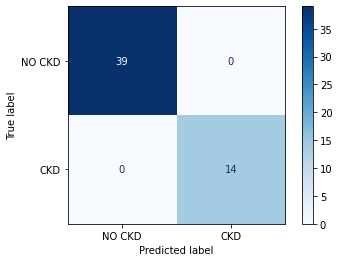

In [125]:
plot_confusion_matrix(logreg, X_test, y_test, cmap='Blues', 
                      values_format='d', display_labels=['NO CKD', 'CKD']);

### 17. In this hospital case, we want to predict CKD. Do we want to optimize for sensitivity, specificity, or something else? Why? (If you don't think there's one clear answer, that's okay! There rarely is. Be sure to defend your conclusion!)

Answer:

We will want to minimise our type 2 errors, hence improve on specifity. because will not want people to be diagnosed to not have CKD when they actually have,which may lead to many issues . 

### 18 (BONUS). Write a function that will create an ROC curve for you, then plot the ROC curve.

Here's a strategy you might consider:
1. In order to even begin, you'll need some fit model. Use your logistic regression model from problem 12.
2. We want to look at all values of your "threshold" - that is, anything where .predict() gives you above your threshold falls in the "positive class," and anything that is below your threshold falls in the "negative class." Start the threshold at 0.
3. At this value of your threshold, calculate the sensitivity and specificity. Store these values.
4. Increment your threshold by some "step." Maybe set your step to be 0.01, or even smaller.
5. At this value of your threshold, calculate the sensitivity and specificity. Store these values.
6. Repeat steps 3 and 4 until you get to the threshold of 1.
7. Plot the values of sensitivity and 1 - specificity.

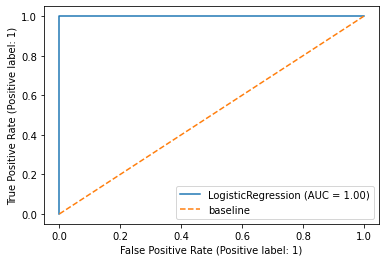

In [128]:
plot_roc_curve(logreg, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [129]:
roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])

1.0

### 19. Suppose you're speaking with the biostatistics lead at Mayo Clinic, who asks you "Why are unbalanced classes generally a problem? Are they a problem in this particular CKD analysis?" How would you respond?

Answer:

yes because if we do not have balanced class, what might potentially be a true CKD patient might end up being classified as not having CKD if we have a unbalanced class of having majority NONE CKD patients. 

hence we need to have sample of actual CKD patients to give this kind of assessment 

### 20. Suppose you're speaking with a doctor at Mayo Clinic who, despite being very smart, doesn't know much about data science or statistics. How would you explain why unbalanced classes are generally a problem to this doctor?

Answer:

We do not want to  classify wrongly of patients having CKD, hence we need more accurate data especially for those with CKD or potential CKD. 


with more samples of patients with CKD, we will have much more accuracy and can predict better in order to help you to step in and decide what courses of action to do next for potential CKD patients 

### 21. Let's create very unbalanced classes just for the sake of this example! Generate very unbalanced classes by [bootstrapping](http://stattrek.com/statistics/dictionary.aspx?definition=sampling_with_replacement) (a.k.a. random sampling with replacement) the majority class.

1. The majority class are those individuals with CKD.
2. Generate a random sample of size 200,000 of individuals who have CKD **with replacement**. (Consider setting a random seed for this part!)
3. Create a new dataframe with the original data plus this random sample of data.
4. Now we should have a dataset with around 200,000 observations, of which only about 0.00075% are non-CKD individuals.

In [141]:
import random 

np.random.seed(123)
unb_ckd = np.random.randint(2,size =200000, dtype = int)


In [142]:
unb_ckd

array([0, 1, 0, ..., 0, 1, 0])

In [144]:
df['class'].value_counts()

0    115
1     43
Name: class, dtype: int64

In [156]:
my_samples = []
for _ in range(5000):
    x = np.random.choice(2, size=10, replace=True)
    my_samples.append(x.mean())

In [157]:
200000*0.00075

150.0

In [153]:
my_samples

[0.5,
 0.6,
 0.3,
 0.3,
 0.2,
 0.6,
 0.4,
 0.4,
 0.4,
 0.5,
 0.7,
 0.6,
 0.5,
 0.8,
 0.4,
 0.3,
 0.7,
 0.7,
 0.4,
 0.2,
 0.6,
 0.4,
 0.5,
 0.8,
 0.8,
 0.6,
 0.5,
 0.6,
 0.4,
 0.6,
 0.4,
 0.6,
 0.7,
 0.3,
 0.5,
 0.8,
 0.6,
 0.2,
 0.5,
 0.7,
 0.4,
 0.6,
 0.7,
 0.6,
 0.5,
 0.6,
 0.4,
 0.4,
 0.5,
 0.5,
 0.5,
 0.5,
 0.8,
 0.2,
 0.4,
 0.3,
 0.3,
 0.7,
 0.5,
 0.6,
 0.6,
 0.6,
 0.5,
 0.8,
 0.3,
 0.5,
 0.5,
 0.5,
 0.7,
 0.5,
 0.3,
 0.5,
 0.3,
 0.4,
 0.7,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.3,
 0.6,
 0.4,
 0.3,
 0.5,
 0.8,
 0.7,
 0.7,
 0.6,
 0.3,
 0.1,
 0.6,
 0.4,
 0.4,
 0.2,
 0.4,
 0.5,
 0.2,
 0.5,
 0.5,
 0.4,
 0.3,
 0.4,
 0.5,
 0.2,
 0.6,
 0.3,
 0.4,
 0.3,
 0.6,
 0.9,
 0.7,
 0.5,
 0.4,
 0.5,
 0.4,
 0.7,
 0.6,
 0.6,
 0.4,
 0.5,
 0.5,
 0.7,
 0.4,
 0.2,
 0.5,
 0.6,
 0.5,
 0.3,
 0.5,
 0.5,
 0.8,
 0.5,
 0.6,
 0.5,
 0.4,
 0.6,
 0.4,
 0.9,
 0.6,
 0.6,
 0.4,
 0.4,
 0.5,
 0.6,
 0.6,
 0.7,
 0.5,
 0.6,
 0.8,
 0.5,
 0.5,
 0.4,
 0.6,
 0.9,
 0.7,
 0.3,
 0.3,
 0.4,
 0.6,
 0.4,
 0.3,
 0.5,
 0.5,
 0.6

### 22. Build a logistic regression model on the unbalanced class data and evaluate its performance using whatever method(s) you see fit. How would you describe the impact of unbalanced classes on logistic regression as a classifier?
> Be sure to look at how well it performs on non-CKD data.

---

## Step 6: Answer the problem.

At this step, you would generally answer the problem! In this situation, you would likely present your model to doctors or administrators at the hospital and show how your model results in reduced false positives/false negatives. Next steps would be to find a way to roll this model and its conclusions out across the hospital so that the outcomes of patients with CKD (and without CKD!) can be improved!